
# Project: Investigate a Dataset - [No-show appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#description">Dataset Description</a></li>
<li><a href="#questions">Questions for Analysis</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project i will investigate this dataset.The data includes some attributes of patients and state if the patients showed up to appointments. The analysis is focused on finding trends influencing patients to show or not show up to appointments.The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
<a id='description'></a>
## Dataset Description 

- PatienID :identification of a patient
- AppointmentID	: identification of each appointment
- Gender : it says 'F' if female or 'M' if man
- ScheduledDay : tells us on what day the patient set up their appointment
- AppointmentDay : the day of the actuall appointment, when they have to visit the doctor
- Age : how old is the patient
- Neighbourhood : indicates the location of the hospital
- Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
- Hipertension : indicates if the patient has hipertension
- Diabetes : indicates if the patient has diabetes
- Alcoholism : indicates if the patient is an alcoholic
- Handcap : indicates if the patient is handicaped
- SMS_received : 1 or more messages sent to the patient
- No-show : it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up






<a id='questions'></a>
## Questions for Analysis
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 
- Does gender have anything to do with if a person does not show up to their appointment?
- Does where a person live affect if they show up to their appointment?
- Does a certain age not show up more than other ages?
- What is the trend in times for persons who show and not show?

<a id='wrangling'></a>
## Data Wrangling



In [1]:
!pip3 install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.columns = ['patient_Id', 'appointment_Id', 'Gender', 'Scheduled_Day', 
              'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship', 'hypertension',
              'Diabetes', 'Aalcoholism', 'Handicap', 'Sms_received', 'No_show']
df.columns

Index(['patient_Id', 'appointment_Id', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'hypertension', 'Diabetes', 'Aalcoholism', 'Handicap', 'Sms_received',
       'No_show'],
      dtype='object')

<a id='cleaning'></a>
## Data Cleaning


In [6]:
df.head(6)

,patient_Id,appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Aalcoholism,Handicap,Sms_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [7]:
#anthor view of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_Id       110527 non-null  float64
 1   appointment_Id   110527 non-null  int64  
 2   Gender           110527 non-null  object 
 3   Scheduled_Day    110527 non-null  object 
 4   Appointment_Day  110527 non-null  object 
 5   Age              110527 non-null  int64  
 6   Neighbourhood    110527 non-null  object 
 7   Scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   Diabetes         110527 non-null  int64  
 10  Aalcoholism      110527 non-null  int64  
 11  Handicap         110527 non-null  int64  
 12  Sms_received     110527 non-null  int64  
 13  No_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**There are some problems in the dataset like** :
1. The patient_id data type is float but should be int.
2. The scheduled_day and appointment_day columns type should be changed to datetime.
3. The appointment_day has no hour specified (it equals to 00:00:00).

- To solve the first problem :


In [8]:
# Check how many patients_ids are not integers
non_int_patient_Ids = df[~ df.patient_Id.apply(lambda x: x.is_integer())]
print('There are {} patients_ids that are not integers'.format(len(non_int_patient_Ids)))
non_int_patient_Ids

There are 5 patients_ids that are not integers


,patient_Id,appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Aalcoholism,Handicap,Sms_received,No_show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


It appears that the only 5 float patient ids are mistakes. Once the decimal part is shortened, I'll see if they're unique identifiers. If that's the case, I'll truncate their decimal parts and keep them in the dataset.

In [9]:
# Extract float patient_ids 
patient_Ids = [93779.52927, 537615.28476, 141724.16655, 39217.84439, 43741.75652]
    
# Convert all float patient_ids to int (by truncate the decimal part)
for V in range(len(patient_Ids)):
    patient_Ids[V] = int(patient_Ids[V])
    if df.query('patient_Id == {}'.format(patient_Ids[V])).empty:
        print('Patient Id == {} does not exist.'.format(patient_Ids[V]))
    else:
        print('Patient Id == {}  exists.'.format(patient_Ids[V]))

Patient Id == 93779 does not exist.
Patient Id == 537615 does not exist.
Patient Id == 141724 does not exist.
Patient Id == 39217 does not exist.
Patient Id == 43741 does not exist.


In [10]:
# Convert patient_id  into int
df['patient_Id'] = df['patient_Id'].astype('int64')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_Id       110527 non-null  int64 
 1   appointment_Id   110527 non-null  int64 
 2   Gender           110527 non-null  object
 3   Scheduled_Day    110527 non-null  object
 4   Appointment_Day  110527 non-null  object
 5   Age              110527 non-null  int64 
 6   Neighbourhood    110527 non-null  object
 7   Scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   Diabetes         110527 non-null  int64 
 10  Aalcoholism      110527 non-null  int64 
 11  Handicap         110527 non-null  int64 
 12  Sms_received     110527 non-null  int64 
 13  No_show          110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


** the second and third problems

In [11]:
# Convert columns types
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.date.astype('datetime64[ns]')
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day']).dt.date.astype('datetime64[ns]')

# Check if the type is now datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_Id       110527 non-null  int64         
 1   appointment_Id   110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   Scheduled_Day    110527 non-null  datetime64[ns]
 4   Appointment_Day  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Aalcoholism      110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  Sms_received     110527 non-null  int64         
 13  No_show          110527 non-null  object        
dtypes: datetime64[ns](2)

In [12]:
df.head()

,patient_Id,appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Aalcoholism,Handicap,Sms_received,No_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 - i want to add some stuff into the dataset to make it more analystic
 * It could be interesting to know how much time elapsed between a scheduled visit and the actual visit. There is no such data column, however the scheduled day and appointment day columns can be used to determine it. 
 * i will Create a new column called days_of_awaiting_time

In [13]:
# Create days of awaiting time column
df['days_of_awaiting_time'] = (df.Appointment_Day - df.Scheduled_Day).dt.days
# and convert timedelta to int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   patient_Id             110527 non-null  int64         
 1   appointment_Id         110527 non-null  int64         
 2   Gender                 110527 non-null  object        
 3   Scheduled_Day          110527 non-null  datetime64[ns]
 4   Appointment_Day        110527 non-null  datetime64[ns]
 5   Age                    110527 non-null  int64         
 6   Neighbourhood          110527 non-null  object        
 7   Scholarship            110527 non-null  int64         
 8   hypertension           110527 non-null  int64         
 9   Diabetes               110527 non-null  int64         
 10  Aalcoholism            110527 non-null  int64         
 11  Handicap               110527 non-null  int64         
 12  Sms_received           110527 non-null  int6

In [14]:
df.describe()


,patient_Id,appointment_Id,Age,Scholarship,hypertension,Diabetes,Aalcoholism,Handicap,Sms_received,days_of_awaiting_time
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


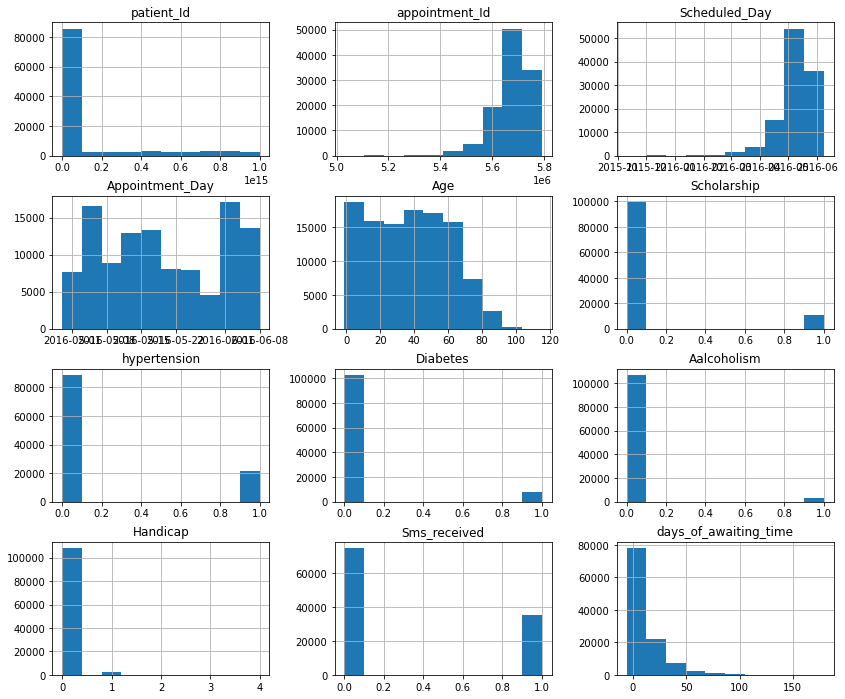

In [15]:
df.hist(figsize=(14,12));

 ### observations: 
1. The patients are on average 37 years old. A quarter of the patients are under the age of 18, and the majority are under the age of 55. In the dataset, there is a problem with the data range. There are some very elderly people, and the age value cannot be less than 0. To be looked into.

2. In contrast to the other categorical variables in this dataset, handicap is represented by four classes. This could be the consequence of an error, or it could fall into one of four categories. Both approaches have the potential to be valid, and this should be checked by a subject matter expert.

3. sms received: 75% of patients received a text message reminding them of their appointment.

4. awaiting time days: Patients waited an average of 10 days for an appointment. 50% of patients waited up to 4 days, and 75% waited up to 7 days.

## Histogram observations
- age: There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.
- Alcoholism: Most of the patients are not alcoholics.
- Diabetes: Most of the patients are not diabetes but more than alcoholics.
- Handicap: There are for handicap categories with most of the people not being handicapted.
- Hypertension: Most patients do not have hypertension diagnosed.

### Scheduled_Day


In [16]:
# Print Unique Values of scheduled day coulmns
print("Unique Values in Scheduled_Day ara : {}".format(df.Scheduled_Day.unique()))

Unique Values in Scheduled_Day ara : ['2016-04-29T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-04-20T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-04-18T00:00:00.000000000'
 '2016-04-11T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-04-15T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-04-05T00:00:00.000000000' '2016-04-08T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-07T00:00:00.000000000' '2016-03-17T00:00:00.000000000'
 '2016-03-30T00:00:00.000000000' '2016-03-29T00:00:00.000000000'
 '2016-03-18T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-04T00:00:00.000000000' '2016-03-15T00:00:00.000000000'
 '2016-03-14T00:00:00.000000000' '2016-03-21T00:00:00.000000000'
 '2016-03-23T00:00:00.000000000' '2016-03-22T00:00:00

### Gender

In [17]:
# Print Unique Values
print("Unique Values in gender are : {}".format(df.Gender.unique()))

Unique Values in gender are : ['F' 'M']


### Appointment day

In [18]:
print("Unique Values in appointment_day : {}".format(df.Appointment_Day.unique()))

Unique Values in appointment_day : ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-25T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-18T00:00:00.000000000'
 '2016-05-14T00:00:00.000000000' '2016-06-02T00:00:00.000000000'
 '2016-06-03T00:00:00.000000000' '2016-06-06T00:00:00.000000000'
 '2016-06-07T00:00:00.000000000' '2016-06-01T00:00:00.000000000'
 '2016-06-08T00:00:00.000000000']


### Age

In [19]:
print("Unique Values in age: {}".format(df.Age.unique()))

Unique Values in age: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


Age value cannot be less than 0 or bigger than 100 . I will remove all records with such values. 

In [20]:
print('Without any change')
print("Patients with Age less than -1 : {}".format(df[df.Age == -1].shape[0]))
print("Patients with Age equal to 0 : {}".format(df[df.Age == 0].shape[0]))
print("Patients with Age greater than 100 : {}".format(df[df.Age > 100].shape[0]))

df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

print('with change')
print("Patients with Age less than -1 : {}".format(df[df.Age == -1].shape[0]))
print("Patients with Age equal to 0 : {}".format(df[df.Age == 0].shape[0]))
print("Patients with Age greater than 100 : {}".format(df[df.Age > 110].shape[0]))

Without any change
Patients with Age less than -1 : 1
Patients with Age equal to 0 : 3539
Patients with Age greater than 100 : 7
with change
Patients with Age less than -1 : 0
Patients with Age equal to 0 : 3539
Patients with Age greater than 100 : 0


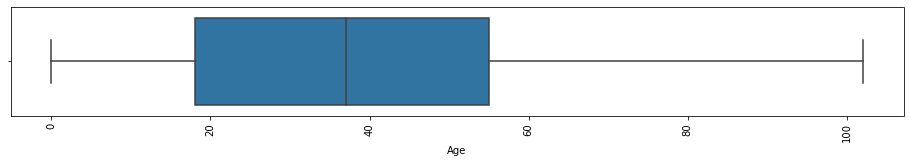

In [21]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
A= sns.boxplot(x=df.Age)

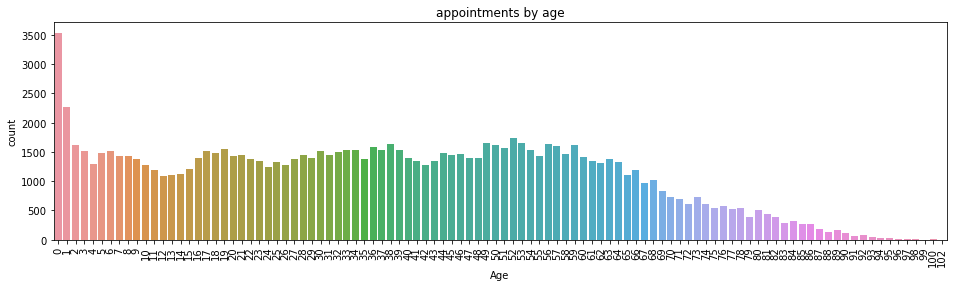

In [22]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("appointments by age")
plt.show()

### Scholarship

In [23]:
print("Unique Values in scholarship : {}".format(df.Scholarship.unique()))


Unique Values in scholarship : [0 1]


### Diabetes

In [24]:
print("Unique Values in Diabetes : {}".format(df.Diabetes.unique()))

Unique Values in Diabetes : [0 1]


### Alcoholism

In [25]:
print("Unique Values in Aalcoholism : {}".format(df.Aalcoholism.unique()))

Unique Values in Aalcoholism : [0 1]


### Handicap


In [26]:
print("Unique Values in Handicap{}".format(df.Handicap.unique()))


Unique Values in Handicap[0 1 2 3 4]


### days of awaiting time

In [27]:
print("Unique Values in Days of awaiting time : {}".format(df.days_of_awaiting_time.unique()))


Unique Values in Days of awaiting time : [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127
 111 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95  -6 139
 132 179 117 146 123]


In [28]:
# Awaiting time cannot be less than 0
print('Before change: {}'.format(df[(df.days_of_awaiting_time< 0)].days_of_awaiting_time.value_counts()))
df = df[(df.days_of_awaiting_time >= 0)]
#Check if any awaiting time days values below 0 left in the dataset
print('After change: {}'.format(df[(df.days_of_awaiting_time < 0)].days_of_awaiting_time.value_counts()))

Before change: -1    4
-6    1
Name: days_of_awaiting_time, dtype: int64
After change: Series([], Name: days_of_awaiting_time, dtype: int64)


### Sms received

In [29]:
print("Unique Values in sms_received : {}".format(df.Sms_received.unique()))

Unique Values in sms_received : [0 1]


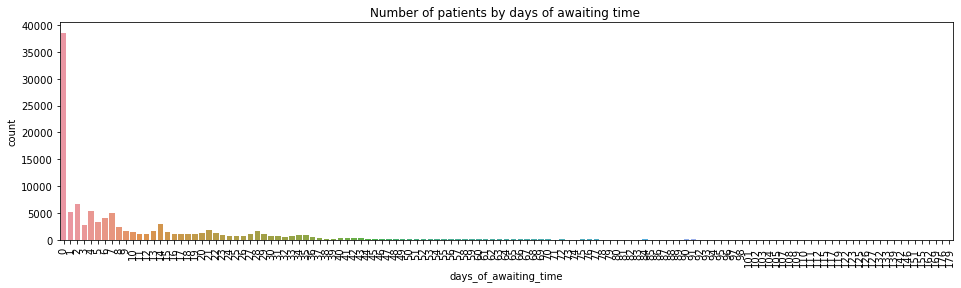

In [30]:
# Let's see how many there are patients of each age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.days_of_awaiting_time)
ax.set_title("Number of patients by days of awaiting time ")
plt.show()


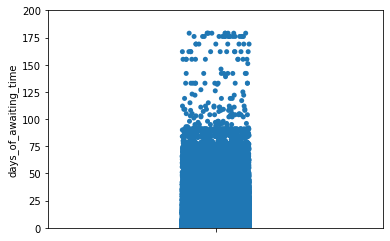

In [31]:
sns.stripplot(data = df, y = 'days_of_awaiting_time', jitter = True)
plt.ylim(0, 200)
plt.show();

### scheduled day

Scheduling visits started on: 2015-11-10 00:00:00.
Scheduling visits ended on: 2016-06-08 00:00:00.


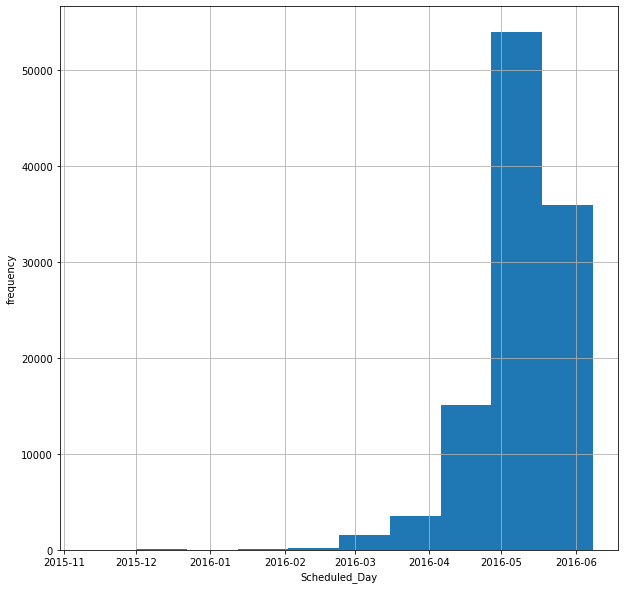

In [32]:
print('Scheduling visits started on: {}.'.format(df['Scheduled_Day'].min()))
print('Scheduling visits ended on: {}.'.format(df['Scheduled_Day'].max()))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Scheduled_Day')
ax.set_ylabel('frequency')
df['Scheduled_Day'].hist();

The distribution of appointments scheduled is left skewed. Most of the schedules were made between April and June of 2016

### appointment day

Visit appointments started on: 2016-04-29 00:00:00.
Visit appointments ended on: 2016-06-08 00:00:00.


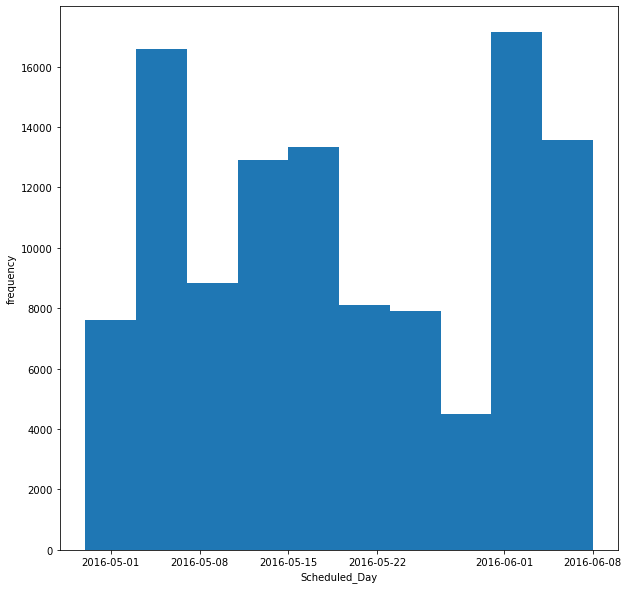

In [33]:
print('Visit appointments started on: {}.'.format(df['Appointment_Day'].min()))
print('Visit appointments ended on: {}.'.format(df['Appointment_Day'].max()))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Scheduled_Day')
ax.set_ylabel('frequency')
df['Appointment_Day'].hist(grid=False, ax=ax);

<a id='eda'></a>
## Exploratory Data Analysis


## 1.What is the gender distribution for show / no-show patients?

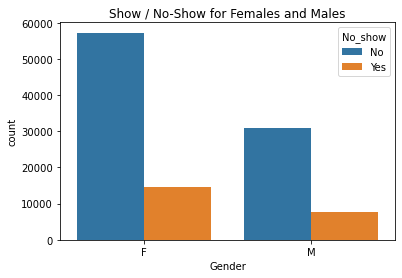

Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.
Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%.


In [34]:
all_appointments_by_f = len(df.loc[df['Gender'] == "F"])
all_appointments_by_m = len(df.loc[df['Gender'] == "M"])

missed_appointments_by_f = len(df.query('No_show == "Yes" and Gender == "F"'))
missed_appointments_by_m = len(df.loc[(df['Gender'] == "M") & (df['No_show'] == "Yes")])

missed_ratio_f = int(round(missed_appointments_by_f/all_appointments_by_f*100))
missed_ratio_m = int(round(missed_appointments_by_m/all_appointments_by_m*100))

ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(all_appointments_by_f, missed_appointments_by_f, missed_ratio_f))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(all_appointments_by_m, missed_appointments_by_m, missed_ratio_m))

## 2. how many percent of patients missed their scheduled appointment?

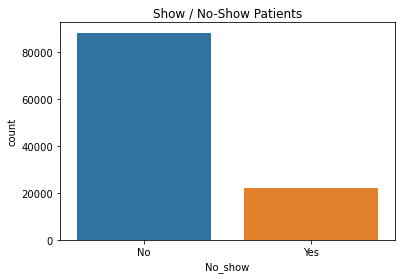

20% of appointments were missed.


In [35]:
all_appointments = df.shape[0]
missed_appointments = len(df.query('No_show == \'Yes\''))
missed_ratio = int(round(missed_appointments/all_appointments*100))

ax = sns.countplot(x=df.No_show, data=df)
ax.set_title("Show / No-Show Patients")
plt.show();

print('{}% of appointments were missed.'.format(missed_ratio))

### 3. What are important factor to know if the patient show up or not ?

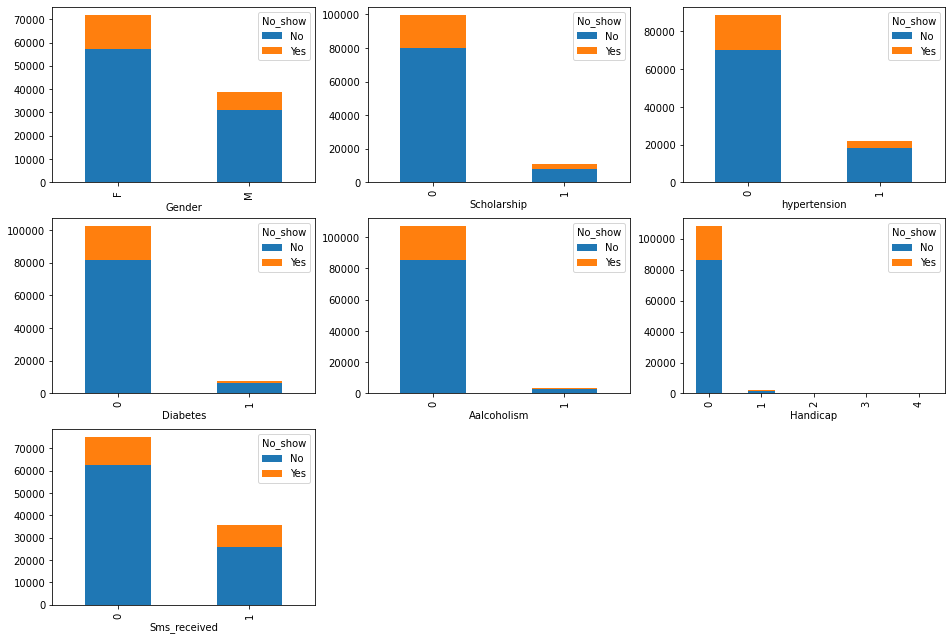

In [36]:
# First, let's look at categorical variables
categories = ['Gender', 'Scholarship', 'hypertension', 'Diabetes', 'Aalcoholism', 'Handicap', 'Sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categories):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True)

<a id='conclusions'></a>
## Conclusions
I saw the data set and fix some problems like float names id, remove wrong data and adding new object using the existing ones.
also we have one explortory data which is "no-show".

what i have manafed to find is :
1. Scheduling visits started on 2015-11-10 and ended on 2016-06-08.
2. Visit appointments started on 2016-04-29 and ended on 2016-06-08.
3. Most of the patients are not alcoholics.
4. Most of the patients are not diabetes but more than alcoholics.
5. There are many very young people in the dataset (most of them of age 0) but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.
6. The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
7. There are for handicap categories with most of the people not being handicapted.
8. Most patients do not have hypertension diagnosed.
9. On average, 20% of appointments were missed.
10. For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.


